In [26]:
#The image detection model built in python
!pip install Facedetection

In [27]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [28]:
cd "/content/gdrive/My Drive/INuclei notebook"

/content/gdrive/My Drive/INuclei notebook


In [29]:
!pip install face_detection

In [30]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data, exposure
import cv2

In [31]:
image = cv2.imread('Robert De Niro.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

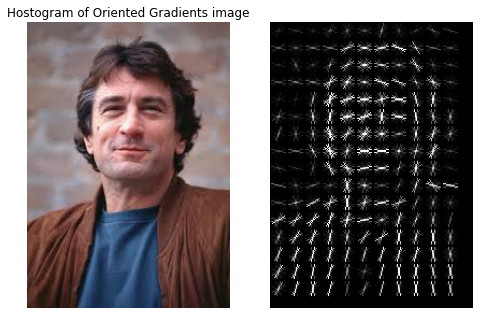

In [32]:
fd, hog_image = hog(image, orientations = 8, pixels_per_cell = (16,16), cells_per_block =(1,1), visualize = True, multichannel = True)

#plot input and hog image
fig , (ax1, ax2) = plt.subplots(1,2, figsize= (8,6), sharex = True , sharey= True)
ax1.axis('off')
ax1.imshow(image, cmap = plt.cm.gray)
ax1.set_title('Input original image')

#Rescale histogram for a better display
hog_rescaled = exposure.rescale_intensity(hog_image, in_range= (0,10))
ax2.axis('off')
ax2.imshow(hog_rescaled, cmap = plt.cm.gray)
ax1.set_title('Hostogram of Oriented Gradients image')

plt.show()

In [33]:
len(fd)

1408

In [34]:
image.shape

(266, 189, 3)

In [35]:
!pip install face_recognition

In [36]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.pyplot import Circle
import numpy as np
%matplotlib inline

In [37]:
import dlib
import face_recognition

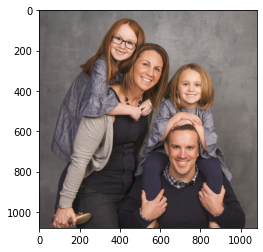

In [38]:
image_2 = cv2.imread('Multiple picture.jpg')
image_2 = cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB)
plt.imshow(image_2)

In [39]:
face_location_in_image = face_recognition.face_locations(image_2)
number_of_faces = len(face_location_in_image)
print('The number of faces found in the given image is', number_of_faces)

The number of faces found in the given image is 4


The picture is located at the pixel location top:236, right:614, bottom:391, left:459
The picture is located at the pixel location top:325, right:812, bottom:454, left:683
The picture is located at the pixel location top:632, right:786, bottom:786, left:631
The picture is located at the pixel location top:110, right:468, bottom:239, left:339


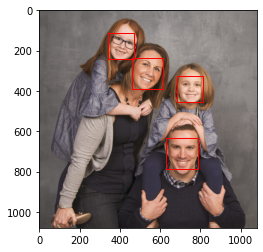

In [40]:
plt.imshow(image_2)
ax = plt.gca()

for i in face_location_in_image:
  top, right, bottom, left = i
  a,w,d,s = left, top, right,bottom
  print('The picture is located at the pixel location top:{}, right:{}, bottom:{}, left:{}'.format(w,d,s,a))

  draw_rectangle = Rectangle((a,w), d-a, s-w, fill = False, color ='Red')
  ax.add_patch(draw_rectangle)

plt.show()

Facial recongnition


In [41]:
image_base = cv2.imread('Robert De Niro.jpg')
Robert_De_Niro = cv2.cvtColor(image_base, cv2.COLOR_BGR2RGB)

image_base = cv2.imread('Morgan Freeman.jpg')
Morgan_Freeman = cv2.cvtColor(image_base, cv2.COLOR_BGR2RGB)

image_base = cv2.imread('Lebron James.jpg')
Lebron_James = cv2.cvtColor(image_base, cv2.COLOR_BGR2RGB)


In [42]:
robert_encoding = face_recognition.face_encodings(Robert_De_Niro)[0]
morgan_encoding = face_recognition.face_encodings(Morgan_Freeman)[0]
lebron_encoding = face_recognition.face_encodings(Lebron_James)[0]

known_face_encodings = [robert_encoding, morgan_encoding, lebron_encoding]

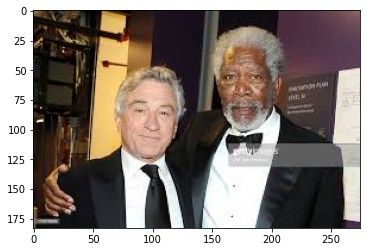

In [43]:
image_3 = cv2.imread('Robert de niro and Morgan freeman.jpg')
Together_images = cv2.cvtColor(image_3, cv2.COLOR_BGR2RGB)
plt.imshow(Together_images)

together_encodings = face_recognition.face_encodings(Together_images)

In [44]:
from scipy.spatial import distance 

for i in together_encodings:
  results = []
  for j in known_face_encodings:
    d = distance.euclidean(j, i)
    results.append(d)
  threshold = 0.6
  results = np.array(results) <= threshold

  name = 'Unknown'

  if results[0]:
    name = 'Robert De Niro'
  elif results[1]:
    name = 'Morgan Freeman'
  elif results[2]:
    name = 'Lebron James'
  elif results[3]:
    name = 'None'

  print(f'Found {name} in the image')




Found Robert De Niro in the image
Found Morgan Freeman in the image
